In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes= True)
%matplotlib inline

In [40]:
auto = pd.read_csv("Automobile.csv")

In [41]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Distribution plot
dist stands for distribution.There are many different ways to visualize the distribution of your data:
for example
- a histogram
- a KDE plot
- a rug plot 


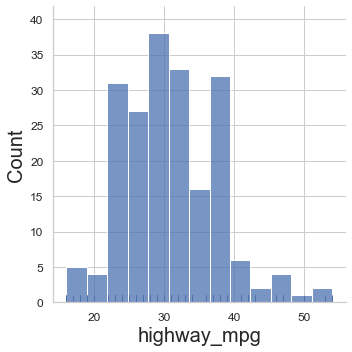

In [237]:
sns.displot(auto, x="highway_mpg",kde=False,rug=True);

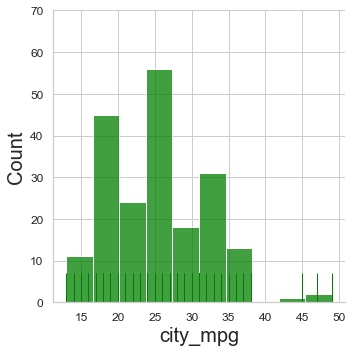

In [281]:
sns.displot(auto["city_mpg"],kde=False,color="green",rug=True,rug_kws={"height":.1});

# Scatter plot

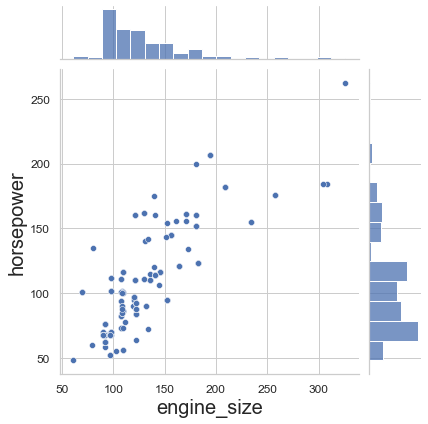

In [257]:
sns.jointplot(data=auto,x="engine_size",y="horsepower");

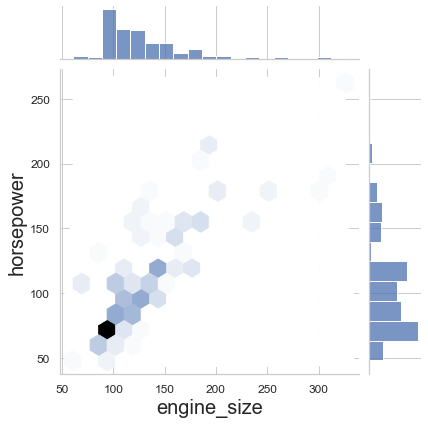

In [258]:
sns.jointplot(data=auto, x="engine_size",y="horsepower", kind="hex");

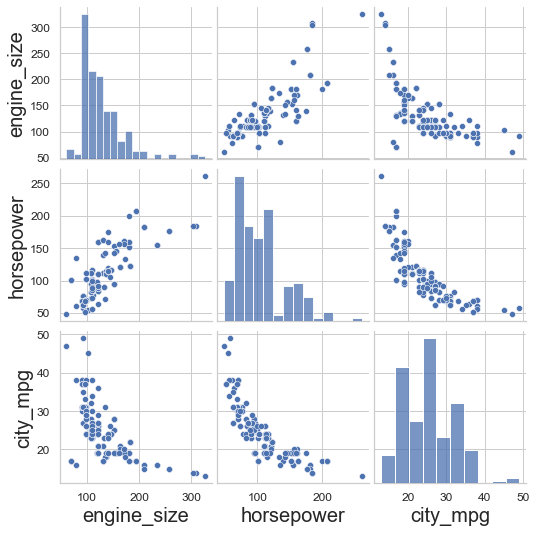

In [259]:
sns.pairplot(auto[["engine_size","horsepower","city_mpg"]]);

### Another Example 1

In [239]:
penguins = sns.load_dataset("penguins")

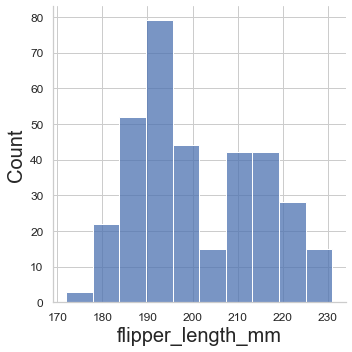

In [240]:
sns.displot(penguins,x="flipper_length_mm",kde=False);

#### But the above histogram appears bimodal so try to refine the graph by selecting different bin sizes to check if your impression of the distribution is consistent or not

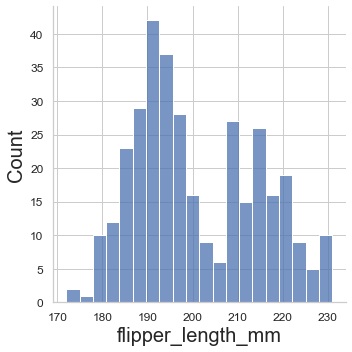

In [241]:
sns.displot(penguins,x="flipper_length_mm",kde=False,bins=20);#default bin number is 10

### Conditioning on other variables ( Assigning a variable to "hue" will draw a separate histogram for each of its unique values and distinguish them by color)

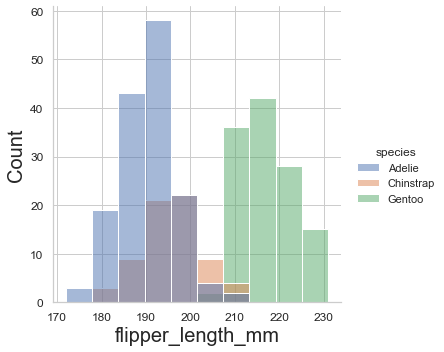

In [242]:
sns.displot(penguins,x="flipper_length_mm",hue="species");#gives us flipper_length_mm with respect to different species

### different ways of conditioning on other variable
     

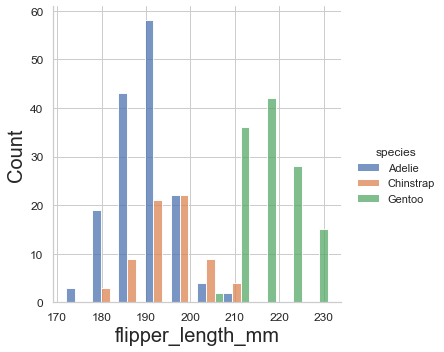

In [268]:
sns.displot(penguins,x="flipper_length_mm",hue="species",multiple="dodge");

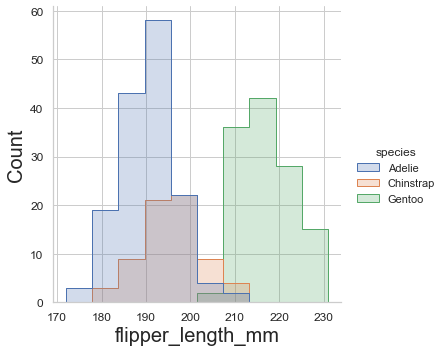

In [260]:
sns.displot(penguins, x="flipper_length_mm", hue="species",element="step");

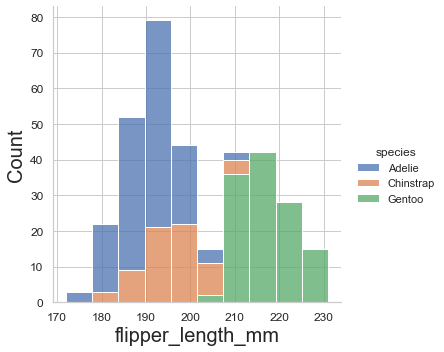

In [261]:
sns.displot(penguins,x="flipper_length_mm",hue="species",multiple="stack");

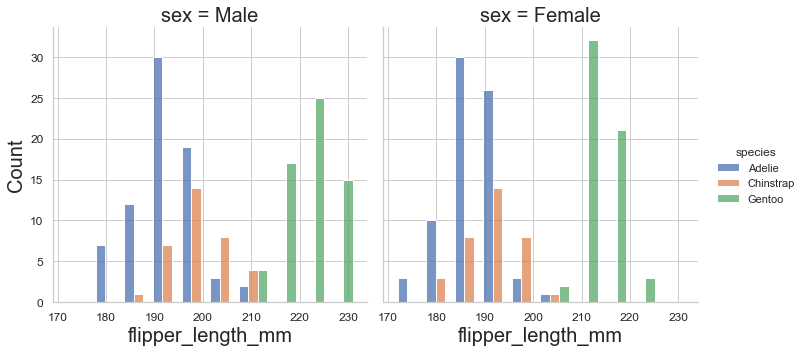

In [262]:
sns.displot(penguins,x="flipper_length_mm",col="sex",hue="species",multiple="dodge");

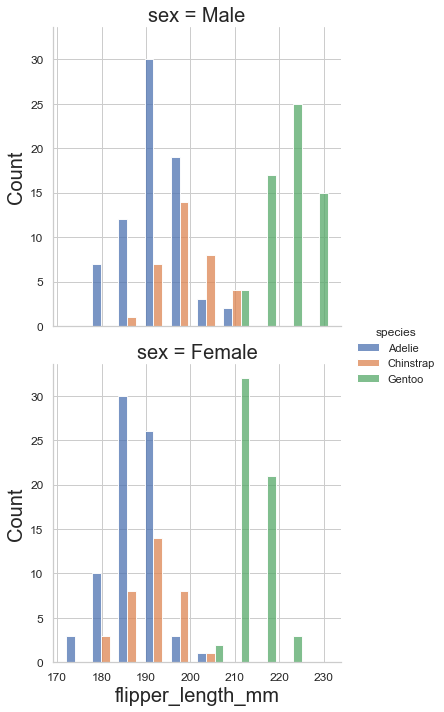

In [263]:
sns.displot(penguins,x="flipper_length_mm",row="sex",hue="species",multiple="dodge");

### Example 2

'0.11.0'

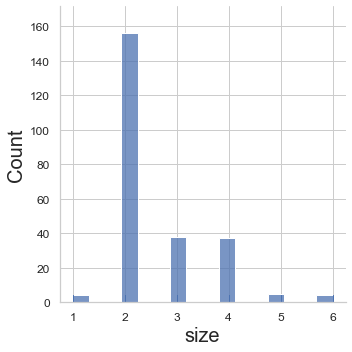

In [264]:
tips = sns.load_dataset("tips")
sns.displot(tips,x="size",kde=False,rug=True);
sns.__version__

### Above small bin width makes plot awkward so specify the precise bin breaks by passing an array to bins

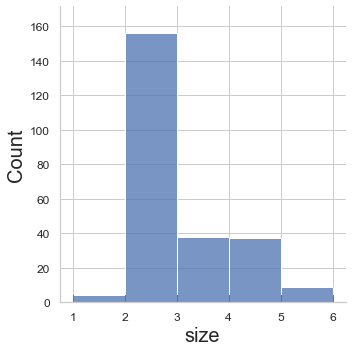

In [265]:
sns.displot(tips,x="size",kde=False,rug=True,bins=[1,2,3,4,5,6]);

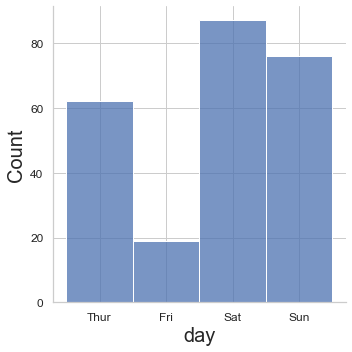

In [266]:
sns.displot(tips,x="day",kde=False,kind="hist");

# Categorical Data Plotting 
  ### Categorical scatterplots:
- stripplot() (with kind=”strip”; the default)
- swarmplot() (with kind=”swarm”)
### Categorical distribution plots:
- boxplot() (with kind=”box”)
- violinplot() (with kind=”violin”)
### Categorical estimate plots:
- pointplot() (with kind=”point”)
- barplot() (with kind=”bar”)
- countplot() (with kind=”count”)
### Strip plot and Swarm plot
Both are scatter plot for categorical data and the goal of both the plots is to represent our data as circular dots. However these dots are arranged differently in these two types of figures. 
-  In swarm plot dots are arranged in neat vertical columns so you can estimate the distribution of your data by looking at the width of the swarm plot. 
- In strip plot however dots are arranged randomly in the vertical direction which means we can no longer use the width of the plot to estimate the distribution of data, but in strip plot the dots will be transparent so that you can use the colour intensity to estimate the density of your data. Strip plot has a attribute called "jitter"(by default jitter value is 0.1) which means randomly moving each dot a little above or below the line which were originally overlapping



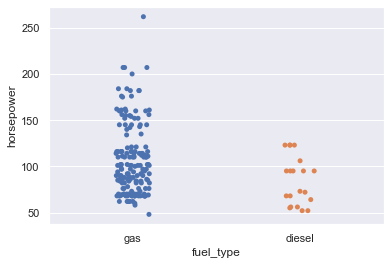

In [44]:
sns.stripplot(data=auto,x="fuel_type",y="horsepower");#by default jitter is true with default value of 0.1

### Another example 

In [214]:
cars= sns.load_dataset("mpg").dropna()
cars.shape

(392, 9)

In [141]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


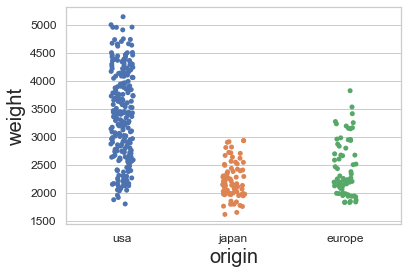

In [215]:
sns.stripplot(data=cars,x="origin",y="weight");

### hue 

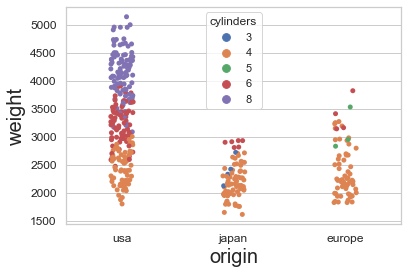

In [216]:
sns.stripplot(data=cars,x="origin",y="weight",hue="cylinders");

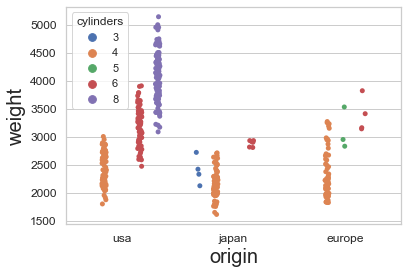

In [219]:
sns.stripplot(data=cars,x="origin",y="weight",hue="cylinders",dodge=True);

#### use "alpha" to make data points more transparent so that you start seeing where data points overlap each other and help you understand the density of your data 

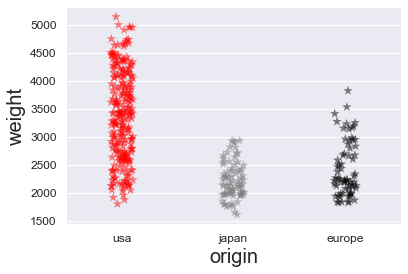

In [146]:
sns.stripplot(data=cars,x="origin",y="weight",palette=["red","gray","black"],marker=r"*",size=10,alpha=.5);

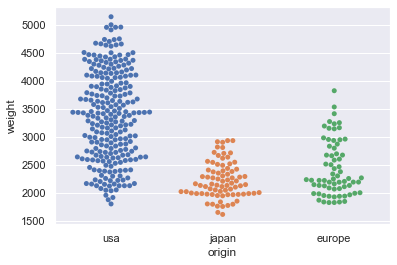

In [45]:
sns.swarmplot(data=cars,x="origin",y="weight");


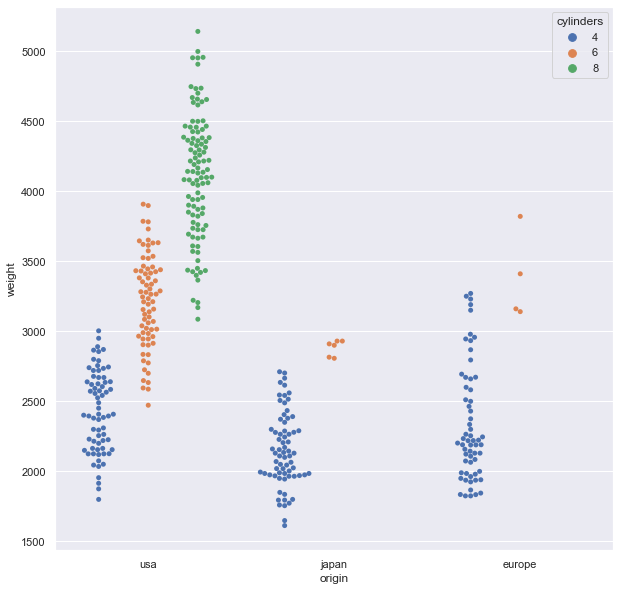

In [62]:
plt.figure(figsize=(10,10))#adjust figure size to accomodate all te data points
#filtered cars with 4,6,8 cylinders 
sns.swarmplot(data=cars[cars["cylinders"].isin([4,6,8])],x="origin",y="weight",hue="cylinders",dodge=True);

### Box plot
The first is the familiar boxplot(). It allows you to understand the distribution of the data in terms of summary statistics. This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.

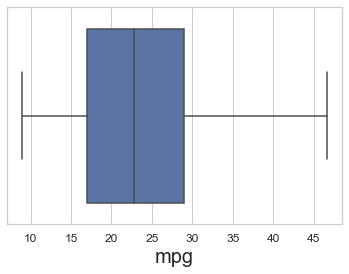

In [148]:
sns.set_style("whitegrid")#just checking set_style method
sns.boxplot(data=cars,x="mpg");

In [162]:
#calculate summary statistics of "mpg" to check if it matches with the plot  
cars["mpg"].describe()


count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

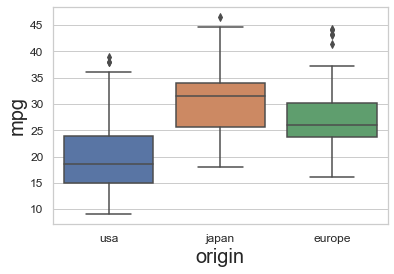

In [163]:
sns.boxplot(x="origin",y="mpg",data=cars);

### Add one more Category using hue

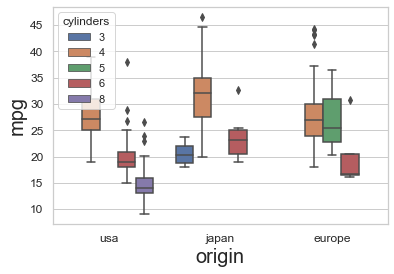

In [167]:
sns.boxplot(x="origin",y="mpg",data=cars,hue="cylinders");

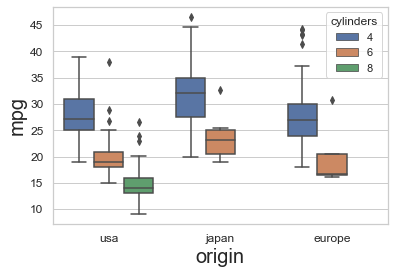

In [169]:
sns.boxplot(x="origin",y="mpg", data=cars[cars["cylinders"].isin([4,6,8])],hue="cylinders");# filter for 4,6 ,8 cylinders

## Styling Options
### order , hue_order, color

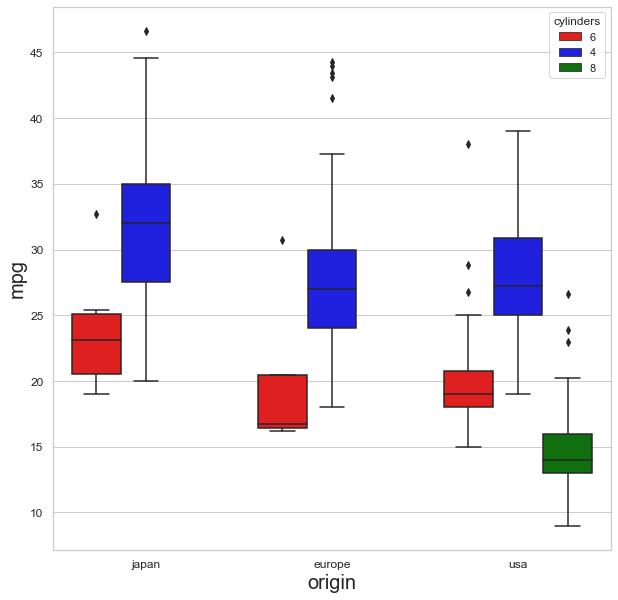

In [192]:
plt.figure(figsize=(10,10))
sns.boxplot(x="origin",y="mpg",hue="cylinders",data=cars[cars["cylinders"].isin([4,6,8])],
            order=["japan","europe","usa"],
            hue_order=[6,4,8],
            palette=["red","blue","green"],
            whis=1.5
            );

## Statistical estimation within categories
Sometimes rather than showing the distribution within each category, you might want to show an estimate of the central tendency of the values. Seaborn has two main ways to show this information. 
### Bar plots
A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars:

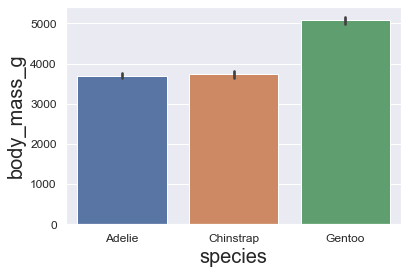

In [137]:
sns.set_style("darkgrid")
plt.rc("axes",labelsize=20)#change axes label font size
plt.rc("xtick",labelsize=12)#change xlabel and ylabel font size
plt.rc("ytick",labelsize=12)
sns.barplot(x="species",y="body_mass_g",data=penguins);#by default estimate calculated is mean


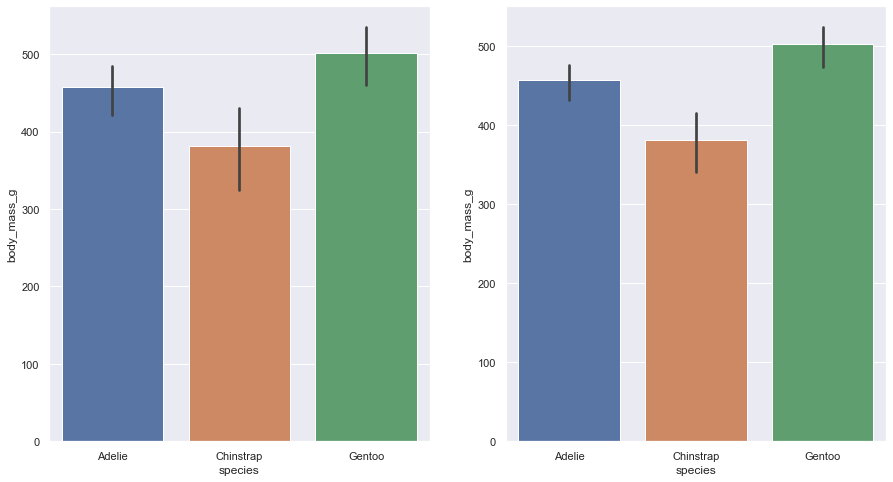

In [111]:
#estimator as mean
#by default confidence interval is 95% ie ci=95. you can change ci value as per your requirement 
#and can see height of those small lines change too 
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.barplot(x="species",y="body_mass_g",data=penguins,estimator=np.std,ci=85,ax=axes[0]);
sns.barplot(x="species",y="body_mass_g",data=penguins,estimator=np.std,ci=70,ax=axes[1]);


### ploting with one more category(use hue)

In [220]:
penguins
#sns.barplot(x="species",y="body_mass_g",data=penguins,hue="sex");

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### order and hue_order

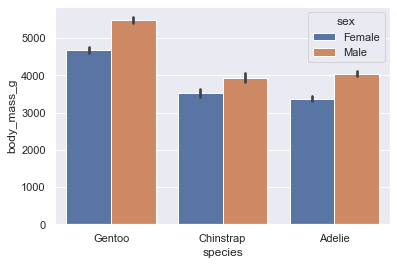

In [119]:
sns.barplot(x="species",y="body_mass_g",data=penguins,order=["Gentoo","Chinstrap","Adelie"],hue="sex",hue_order=["Female","Male"]);

### point plot
- The point plot in seaborn means a scatter plot representing an estimate of central tendency for categories with defined confidence intervals.
- A point plot in seaborn draws scatter plot points for the point estimates such as the mean of the data.The point plot also draws error lines (also called as bars or glyphs) that are extended from the points to desrcibe the dispersion or uncertainty of the point estimate.
- For Example, If X axis denotes the categories winter and summer seasons and the Y axis denotes the number of birds visited a lake, the seaborn PointPlot() function draws a dot(by default the marker is a dot) for the average number of birds visited on each season. The PointPlot also draws the error bars denoting the expected dispersion.
- Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic because your eyes are quite good at picking up on differences of slopes

In [196]:
penguins=penguins.dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


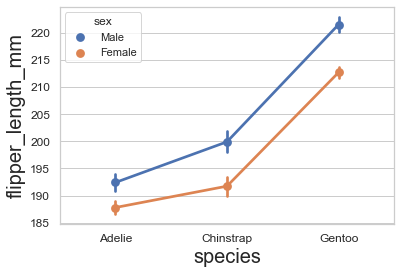

In [199]:
sns.pointplot(x="species",y="flipper_length_mm",data=penguins,hue="sex");

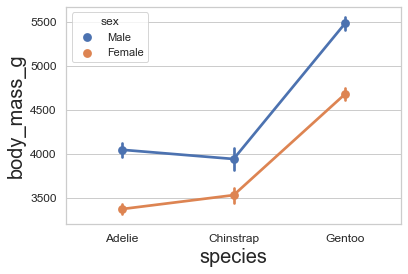

In [201]:
sns.pointplot(x="species",y="body_mass_g",data=penguins,hue="sex");

### count plot
it is a special case for bar plot and counts the number of observations in each categorical value rather than computing the mean of the second variable. This is similar to histogram over categorical rather than quantitative variable

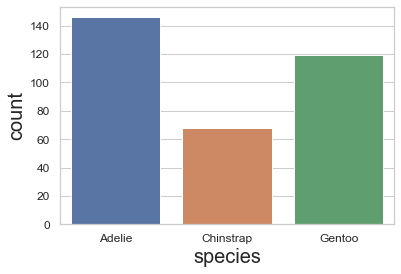

In [204]:
sns.countplot(x="species",data=penguins);

### function to draw linear regression model
lmplot() is one of the most widely used function to plot linear relationship between two variable. it will create a scatter plot along with the best fit line too

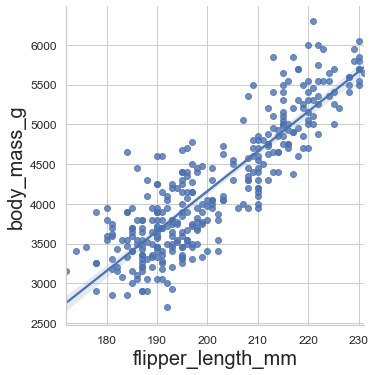

In [213]:
sns.lmplot(x="flipper_length_mm",y="body_mass_g", data=penguins);

### Drawing Multi panel categorical plots(ie kind of subplots with rows and columns containing plots)

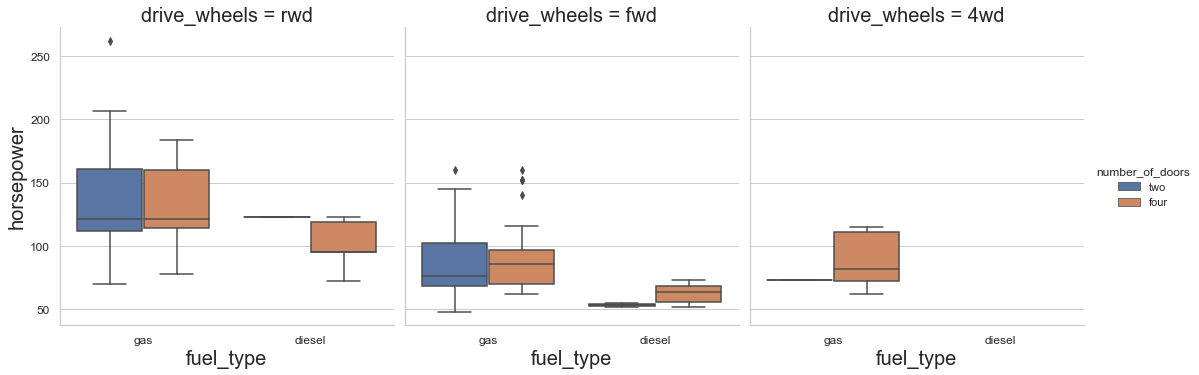

In [227]:
sns.catplot(x="fuel_type",y="horsepower",data=auto,hue="number_of_doors",col="drive_wheels",kind="box");

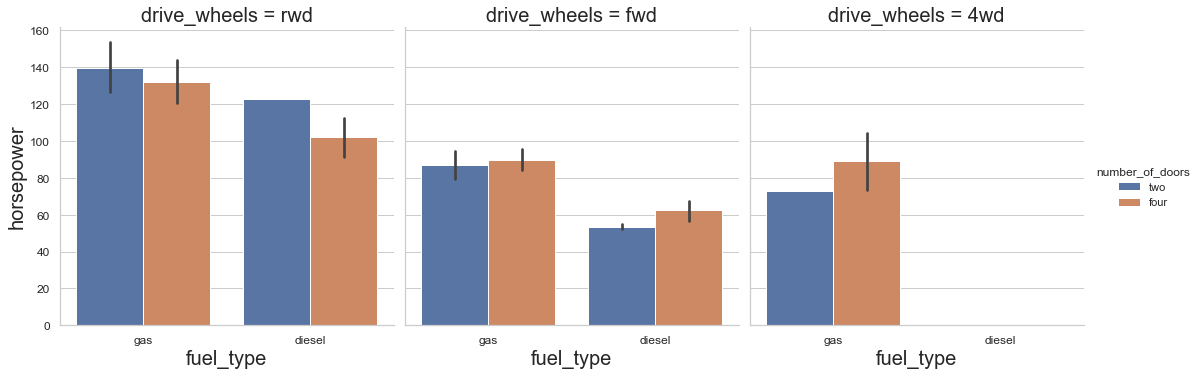

In [228]:
sns.catplot(x="fuel_type",y="horsepower",data=auto,hue="number_of_doors",col="drive_wheels",kind="bar");

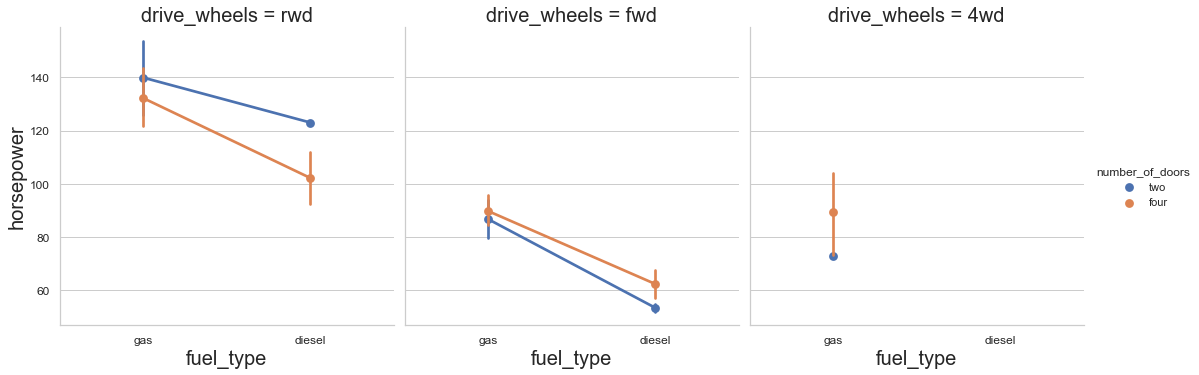

In [229]:
sns.catplot(x="fuel_type",y="horsepower",data=auto,hue="number_of_doors",col="drive_wheels",kind="point");

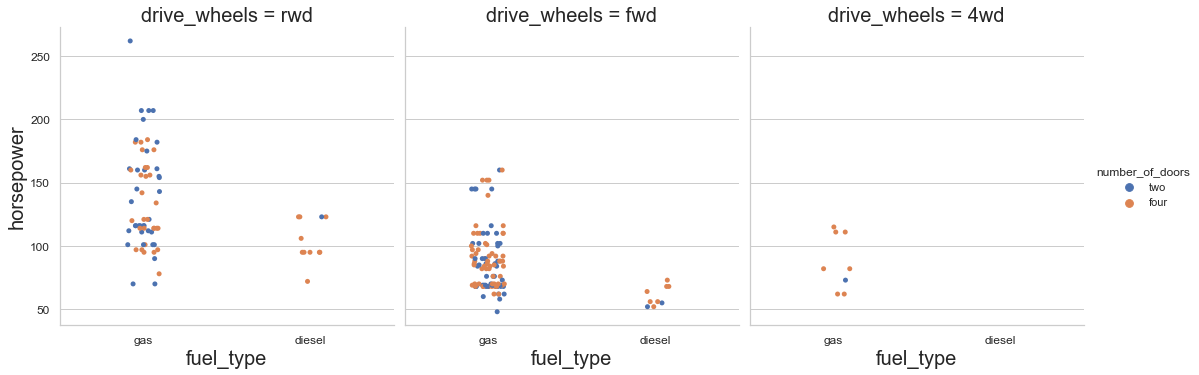

In [230]:
sns.catplot(x="fuel_type",y="horsepower",data=auto,hue="number_of_doors",col="drive_wheels",kind="strip");

C:\Users\minak\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

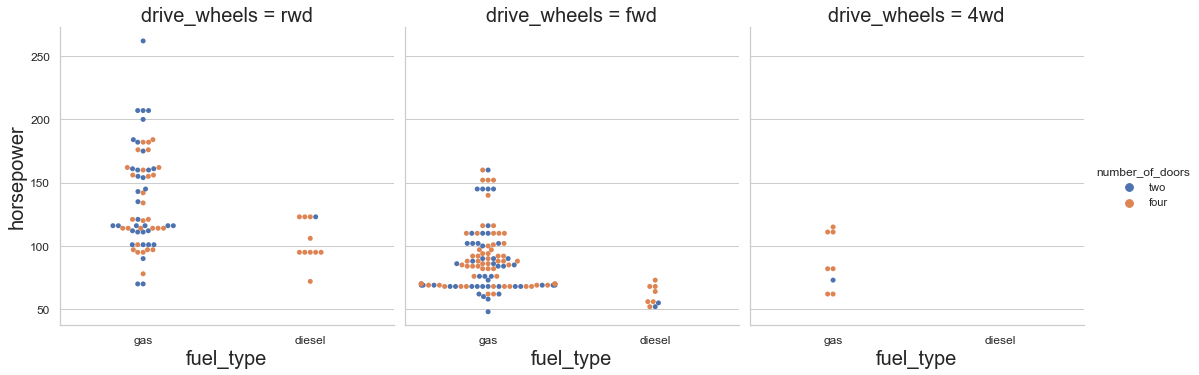

In [236]:
plt.figure(figsize=(12,12))
sns.catplot(x="fuel_type",y="horsepower",data=auto,hue="number_of_doors",col="drive_wheels",kind="swarm");